In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
import itertools as it

In [10]:
from scipy.spatial.distance import cdist

In [132]:
names = (['B1', 'B2', 'B3'] + ['C' + str(k) for k in range(1, 140)] + ['YEAR'] +
         ['C140', 'C141', 'C142'] + ['CT' + str(k) for k in range(1, 27)] +
         ['CH' + str(k) for k in range(1, 5)] + ['Class']
        )
features = np.array(['C' + str(k) for k in range(1, 140)] + ['YEAR'] +
         ['C140', 'C141', 'C142'] + ['CT' + str(k) for k in range(1, 27)] +
         ['CH' + str(k) for k in range(1, 5)]
        )


In [3]:
dat = pd.read_csv('train.txt',  delimiter='\s+', names=names).dropna()

In [4]:
dat.shape

(12000, 177)

In [5]:
for i in range(2):
    for j in range(2):
        for k in range(2):
            print(i, j, k, sum((dat['B1']==i) & (dat['B2']==j) & (dat['B3']==k)) / dat.shape[0])

0 0 0 0.0
0 0 1 0.32658333333333334
0 1 0 0.34025
0 1 1 0.0
1 0 0 0.33316666666666667
1 0 1 0.0
1 1 0 0.0
1 1 1 0.0


In [6]:
dat.head(10)

,B1,B2,B3,C1,C2,C3,C4,C5,C6,C7,...,CT22,CT23,CT24,CT25,CT26,CH1,CH2,CH3,CH4,Class
0,0,0,1,1.26,1.170,0.720,4.59,0.450,0.765,0.54,...,3,2,2,1,3,0,0,0,0,1
1,0,1,0,0.45,0.810,0.000,0.00,0.000,0.855,0.00,...,3,2,1,1,3,0,0,0,0,1
2,0,0,1,0.54,2.880,0.000,0.00,0.000,0.765,0.00,...,3,2,2,1,3,0,0,0,0,1
3,0,0,1,0.81,1.350,0.450,0.00,0.000,0.000,0.72,...,3,2,2,1,3,0,0,0,0,1
4,0,0,1,0.90,1.170,0.765,0.00,0.000,0.630,0.81,...,4,3,2,1,3,0,0,0,0,1
5,1,0,0,7.47,1.080,0.990,1.62,0.540,1.170,0.90,...,4,2,2,1,3,0,0,0,0,1
6,0,1,0,3.51,1.800,0.000,0.00,0.000,0.630,0.00,...,3,2,1,1,3,0,0,0,0,1
7,0,0,1,0.00,1.260,1.170,0.00,0.000,0.630,0.00,...,3,1,1,1,3,0,0,0,0,1
8,1,0,0,0.99,1.035,0.810,0.00,0.000,0.495,0.72,...,4,3,2,1,4,0,0,0,0,0
9,0,1,0,1.62,1.260,0.900,0.99,0.855,0.720,0.00,...,3,2,1,1,3,0,0,0,0,1


# 001

In [99]:
y = dat[(dat['B3']==1)]['Class']
X = dat[(dat['B3']==1)].copy().drop(['B1', 'B2', 'B3', 'Class'], axis=1)
n001 = X.shape[0]
n001

3919

In [93]:
np.sum(y==1)/len(y)

0.6473590201582036

In [11]:
X.head(10)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,CT21,CT22,CT23,CT24,CT25,CT26,CH1,CH2,CH3,CH4
0,1.260,1.170,0.720,4.59,0.45,0.765,0.54,0.495,0.810,0.540,...,4,3,2,2,1,3,0,0,0,0
2,0.540,2.880,0.000,0.00,0.00,0.765,0.00,0.000,0.000,0.720,...,4,3,2,2,1,3,0,0,0,0
3,0.810,1.350,0.450,0.00,0.00,0.000,0.72,0.900,0.855,0.540,...,4,3,2,2,1,3,0,0,0,0
4,0.900,1.170,0.765,0.00,0.00,0.630,0.81,0.000,0.000,0.720,...,5,4,3,2,1,3,0,0,0,0
7,0.000,1.260,1.170,0.00,0.00,0.630,0.00,1.035,0.000,0.630,...,5,3,1,1,1,3,0,0,0,0
15,1.080,3.195,0.720,0.00,0.00,1.620,0.63,0.585,0.450,0.540,...,4,3,2,1,1,3,0,0,0,0
18,1.080,1.440,0.540,0.00,0.45,0.945,0.00,0.000,0.000,0.540,...,3,3,2,1,1,3,0,0,0,0
28,0.765,1.440,0.720,0.54,0.00,0.990,0.00,1.260,0.000,0.630,...,5,3,2,1,1,3,0,0,0,0
35,1.710,1.440,0.855,0.00,0.00,0.990,0.81,0.630,0.720,0.675,...,3,3,2,2,1,3,0,0,0,0
36,0.000,1.845,0.000,0.00,0.00,0.675,0.00,0.000,0.000,0.720,...,5,3,2,1,1,3,0,0,0,0


In [55]:
def similarity(x, y):
    return np.sum(x==y)/len(x)

In [56]:
similar_table = cdist(X, X, metric = disimilarity)

In [57]:
similar_table

array([[1.        , 0.17919075, 0.1734104 , ..., 0.15606936, 0.13294798,
        0.15028902],
       [0.17919075, 1.        , 0.30057803, ..., 0.53757225, 0.33526012,
        0.4566474 ],
       [0.1734104 , 0.30057803, 1.        , ..., 0.28323699, 0.19653179,
        0.26011561],
       ...,
       [0.15606936, 0.53757225, 0.28323699, ..., 1.        , 0.28323699,
        0.41618497],
       [0.13294798, 0.33526012, 0.19653179, ..., 0.28323699, 1.        ,
        0.38728324],
       [0.15028902, 0.4566474 , 0.26011561, ..., 0.41618497, 0.38728324,
        1.        ]])

In [58]:
similar_ins = []
for i in range(n001):
    Ai = {i}
    similar_ins.append(Ai)
    for j in range(n001):
        if similar_table[i,j] > 0.98:
            Ai.add(j)

In [59]:
similar_sets = [A for A in similar_ins if len(A) > 1]

In [100]:
len(similar_sets)

1189

In [108]:
def identical(arr):
    if np.array_equal(arr, [arr[0]] * len(arr)):
        return 1
    else:
        return 0

In [109]:
np.sum([identical(np.array(y.iloc[list(aset)])) for aset in similar_sets]) / len(similar_sets)

0.5895710681244744

In [124]:
strange = [i for i in range(len(similar_sets)) if identical(np.array(y.iloc[list(similar_sets[i])])) == 0]

In [138]:
for i in range(len(strange)):
    print([col for col in features if X[col].iloc[list(similar_sets[strange[i]])[0]] != X[col].iloc[list(similar_sets[strange[i]])[1]]])

['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
[]
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
[]
['YEAR']
['YEAR']
['YEAR']
[]
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
[]
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR', 'C141']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']
['YEAR']

In [139]:
n_sample = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
rf = RandomForestClassifier()
cross_val_score(rf, X, y.ravel(), cv=cv)

array([0.6377551 , 0.68367347, 0.625     , 0.625     , 0.65306122])

<BarContainer object of 10 artists>

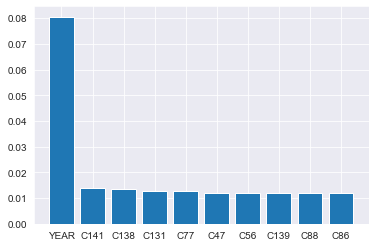

In [140]:
rf.fit(X, y)
importance = rf.feature_importances_
ordered = np.argsort(importance)[::-1]
plt.bar(features[ordered][:10], importance[ordered][:10])

In [11]:
rf.score(X,y)

1.0

In [75]:
X['YEAR'].unique()

array([2001, 2005, 2003, 2004, 2002], dtype=int64)

# 010

In [141]:
y = dat[(dat['B1']==0) & (dat['B2']==1) & (dat['B3']==0) & (dat['YEAR']==2001)]['Class']
X = dat[(dat['B1']==0) & (dat['B2']==1) & (
    dat['B3']==0) & (dat['YEAR']==2001)].copy().drop(['B1', 'B2', 'B3', 'Class'], axis=1)
n_sample = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
rf = RandomForestClassifier()
cross_val_score(rf, X, y.ravel(), cv=cv)

array([0.79310345, 0.62068966, 0.62068966, 0.72413793, 0.82758621])

# 100

In [142]:
y = dat[(dat['B1']==1) & (dat['B2']==0) & (dat['B3']==0)]['Class']
X = dat[(dat['B1']==1) & (dat['B2']==0) & (dat['B3']==0)].copy().drop(['B1', 'B2', 'Class'], axis=1)
n_sample = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
rf = RandomForestClassifier()
cross_val_score(rf, X, y.ravel(), cv=cv)

array([0.85  , 0.8625, 0.855 , 0.84  , 0.8475])